### Correlação e Regressão Simples/Multivariada
**Sugestões de bibliotecas para serem utilizadas**: Pandas, NumPy, Seaborn, Matplotlib, Statsmodels, Scipy

-------------------------------------------------------------------

#### Considerando a base de dados kc_house_data.csv responda as questões de 1 a 6 abaixo:

1. Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?

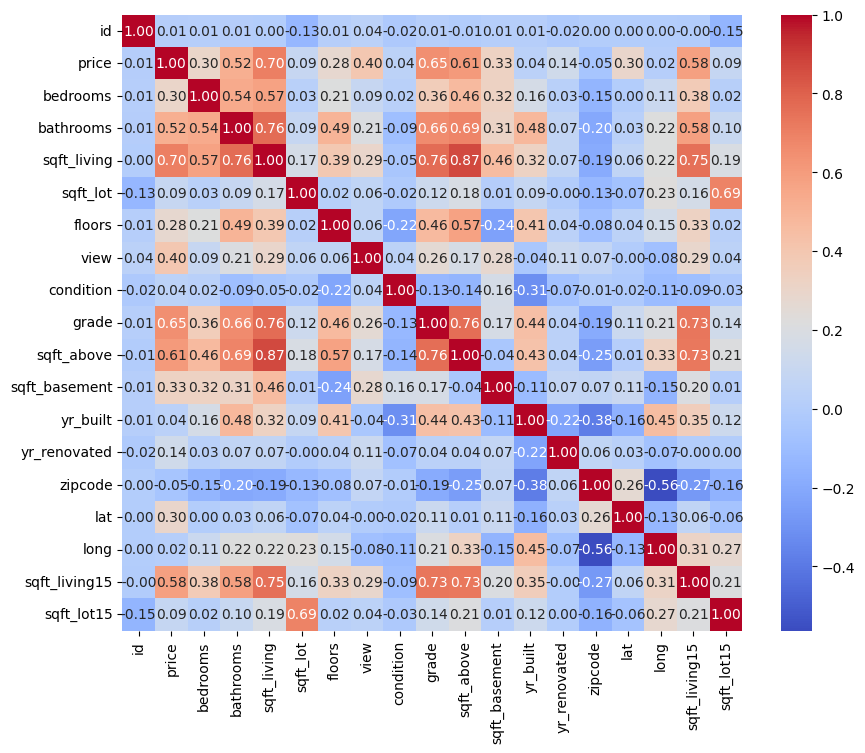

Correlação geral entre price e bedrooms: 0.29920721616918206
Correlação considerando apenas casas com sqft_living > 2000: 0.11912115548964147


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv("kc_house_data.csv")

# Remover colunas não numéricas
numeric_df = df.select_dtypes(include=["number"])

# Criar a matriz de correlação
correlation_matrix = numeric_df.corr()

# Exibir a matriz de correlação usando um heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Correlação entre price e bedrooms (geral)
cor_price_bedrooms = df["price"].corr(df["bedrooms"])
print("Correlação geral entre price e bedrooms:", cor_price_bedrooms)

# Filtrar casas com sqft_living > 2000
filtered_df = df[df["sqft_living"] > 2000]

# Garantir que a variável seja corretamente definida antes de usá-la
cor_price_bedrooms_filtered = filtered_df["price"].corr(filtered_df["bedrooms"])
print("Correlação considerando apenas casas com sqft_living > 2000:", cor_price_bedrooms_filtered)

2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?

In [9]:
filtered_df = df[df["bathrooms"] >= 2]
print("Correlação entre price e sqft_living para casas com pelo menos 2 bathrooms:", filtered_df["price"].corr(filtered_df["sqft_living"]))

Correlação entre price e sqft_living para casas com pelo menos 2 bathrooms: 0.7067107107996193


3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?

In [11]:
import pandas as pd
import numpy as np

# Carregar os dados
df = pd.read_csv("kc_house_data.csv")

# Garantir que estamos lidando apenas com variáveis numéricas
numeric_df = df.select_dtypes(include=["number"])

# Calcular a correlação entre sqft_living e price agrupado por bathrooms
correlations = df.groupby("bathrooms")[["price", "sqft_living"]].corr().unstack().iloc[:,1]

# Exibir os resultados
print(correlations)

bathrooms
0.00    0.916837
0.50         NaN
0.75    0.357178
1.00    0.359529
1.25    0.167331
1.50    0.423405
1.75    0.449225
2.00    0.446945
2.25    0.598274
2.50    0.559945
2.75    0.522397
3.00    0.569033
3.25    0.544659
3.50    0.566392
3.75    0.465538
4.00    0.584480
4.25    0.444766
4.50    0.796040
4.75    0.649359
5.00    0.747219
5.25    0.901217
5.50    0.411625
5.75    1.000000
6.00    1.000000
6.75    1.000000
7.50         NaN
7.75         NaN
8.00         NaN
Name: (price, sqft_living), dtype: float64


4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?

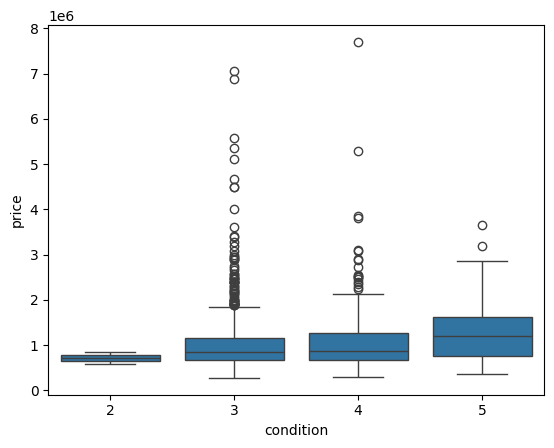

In [12]:
filtered_df = df[df["sqft_living"] > 3000]
sns.boxplot(x=filtered_df["condition"], y=filtered_df["price"])
plt.show()

5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?

In [13]:
filtered_df = df[df["bedrooms"] >= 3]
print("Correlação entre lat e price:", filtered_df["lat"].corr(filtered_df["price"]))
print("Correlação entre long e price:", filtered_df["long"].corr(filtered_df["price"]))

Correlação entre lat e price: 0.31255514248432165
Correlação entre long e price: -0.0072753069929269365


6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.

In [14]:
import scipy.stats as stats

anova_result = stats.f_oneway(df[df["waterfront"] == 0]["price"], df[df["waterfront"] == 1]["price"])
print("Resultado do ANOVA entre waterfront e price:", anova_result)

Resultado do ANOVA entre waterfront e price: F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))


<ipython-input-14-8ae0f2229085>:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(df[df["waterfront"] == 0]["price"], df[df["waterfront"] == 1]["price"])


### Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:

7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.

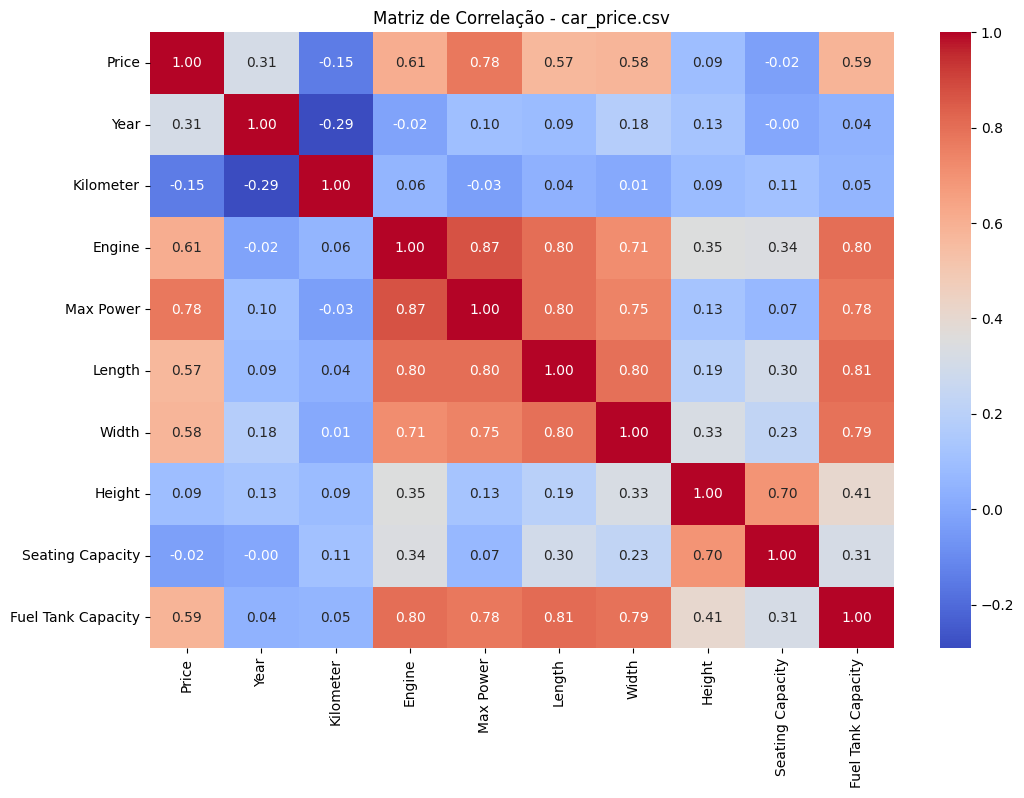

Exemplo de correlação positiva: 0.777
Exemplo de correlação negativa: -0.147
Exemplo de correlação neutra: 0.025


In [29]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df_car = pd.read_csv('/content/car_price.csv')  # ajuste o caminho se necessário

# Limpar colunas com unidades de medida
df_car['Engine'] = df_car['Engine'].str.replace(' cc', '', regex=False).astype(float)
df_car['Max Power'] = df_car['Max Power'].str.extract(r'(\d+\.?\d*)').astype(float)

# Selecionar colunas numéricas
numeric_df = df_car.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr()

# Exibir a matriz de correlação como heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - car_price.csv')
plt.show()

# Mostrar exemplos de correlação com a variável Price
correlation_with_price = correlation_matrix['Price'].drop('Price')  # remove a autocorrelação
exemplo_positiva = correlation_with_price.sort_values(ascending=False).iloc[0]
exemplo_negativa = correlation_with_price.sort_values().iloc[0]
exemplo_neutra = correlation_with_price.abs().sort_values().iloc[0]

print(f'Exemplo de correlação positiva: {exemplo_positiva:.3f}')
print(f'Exemplo de correlação negativa: {exemplo_negativa:.3f}')
print(f'Exemplo de correlação neutra: {exemplo_neutra:.3f}')

8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.

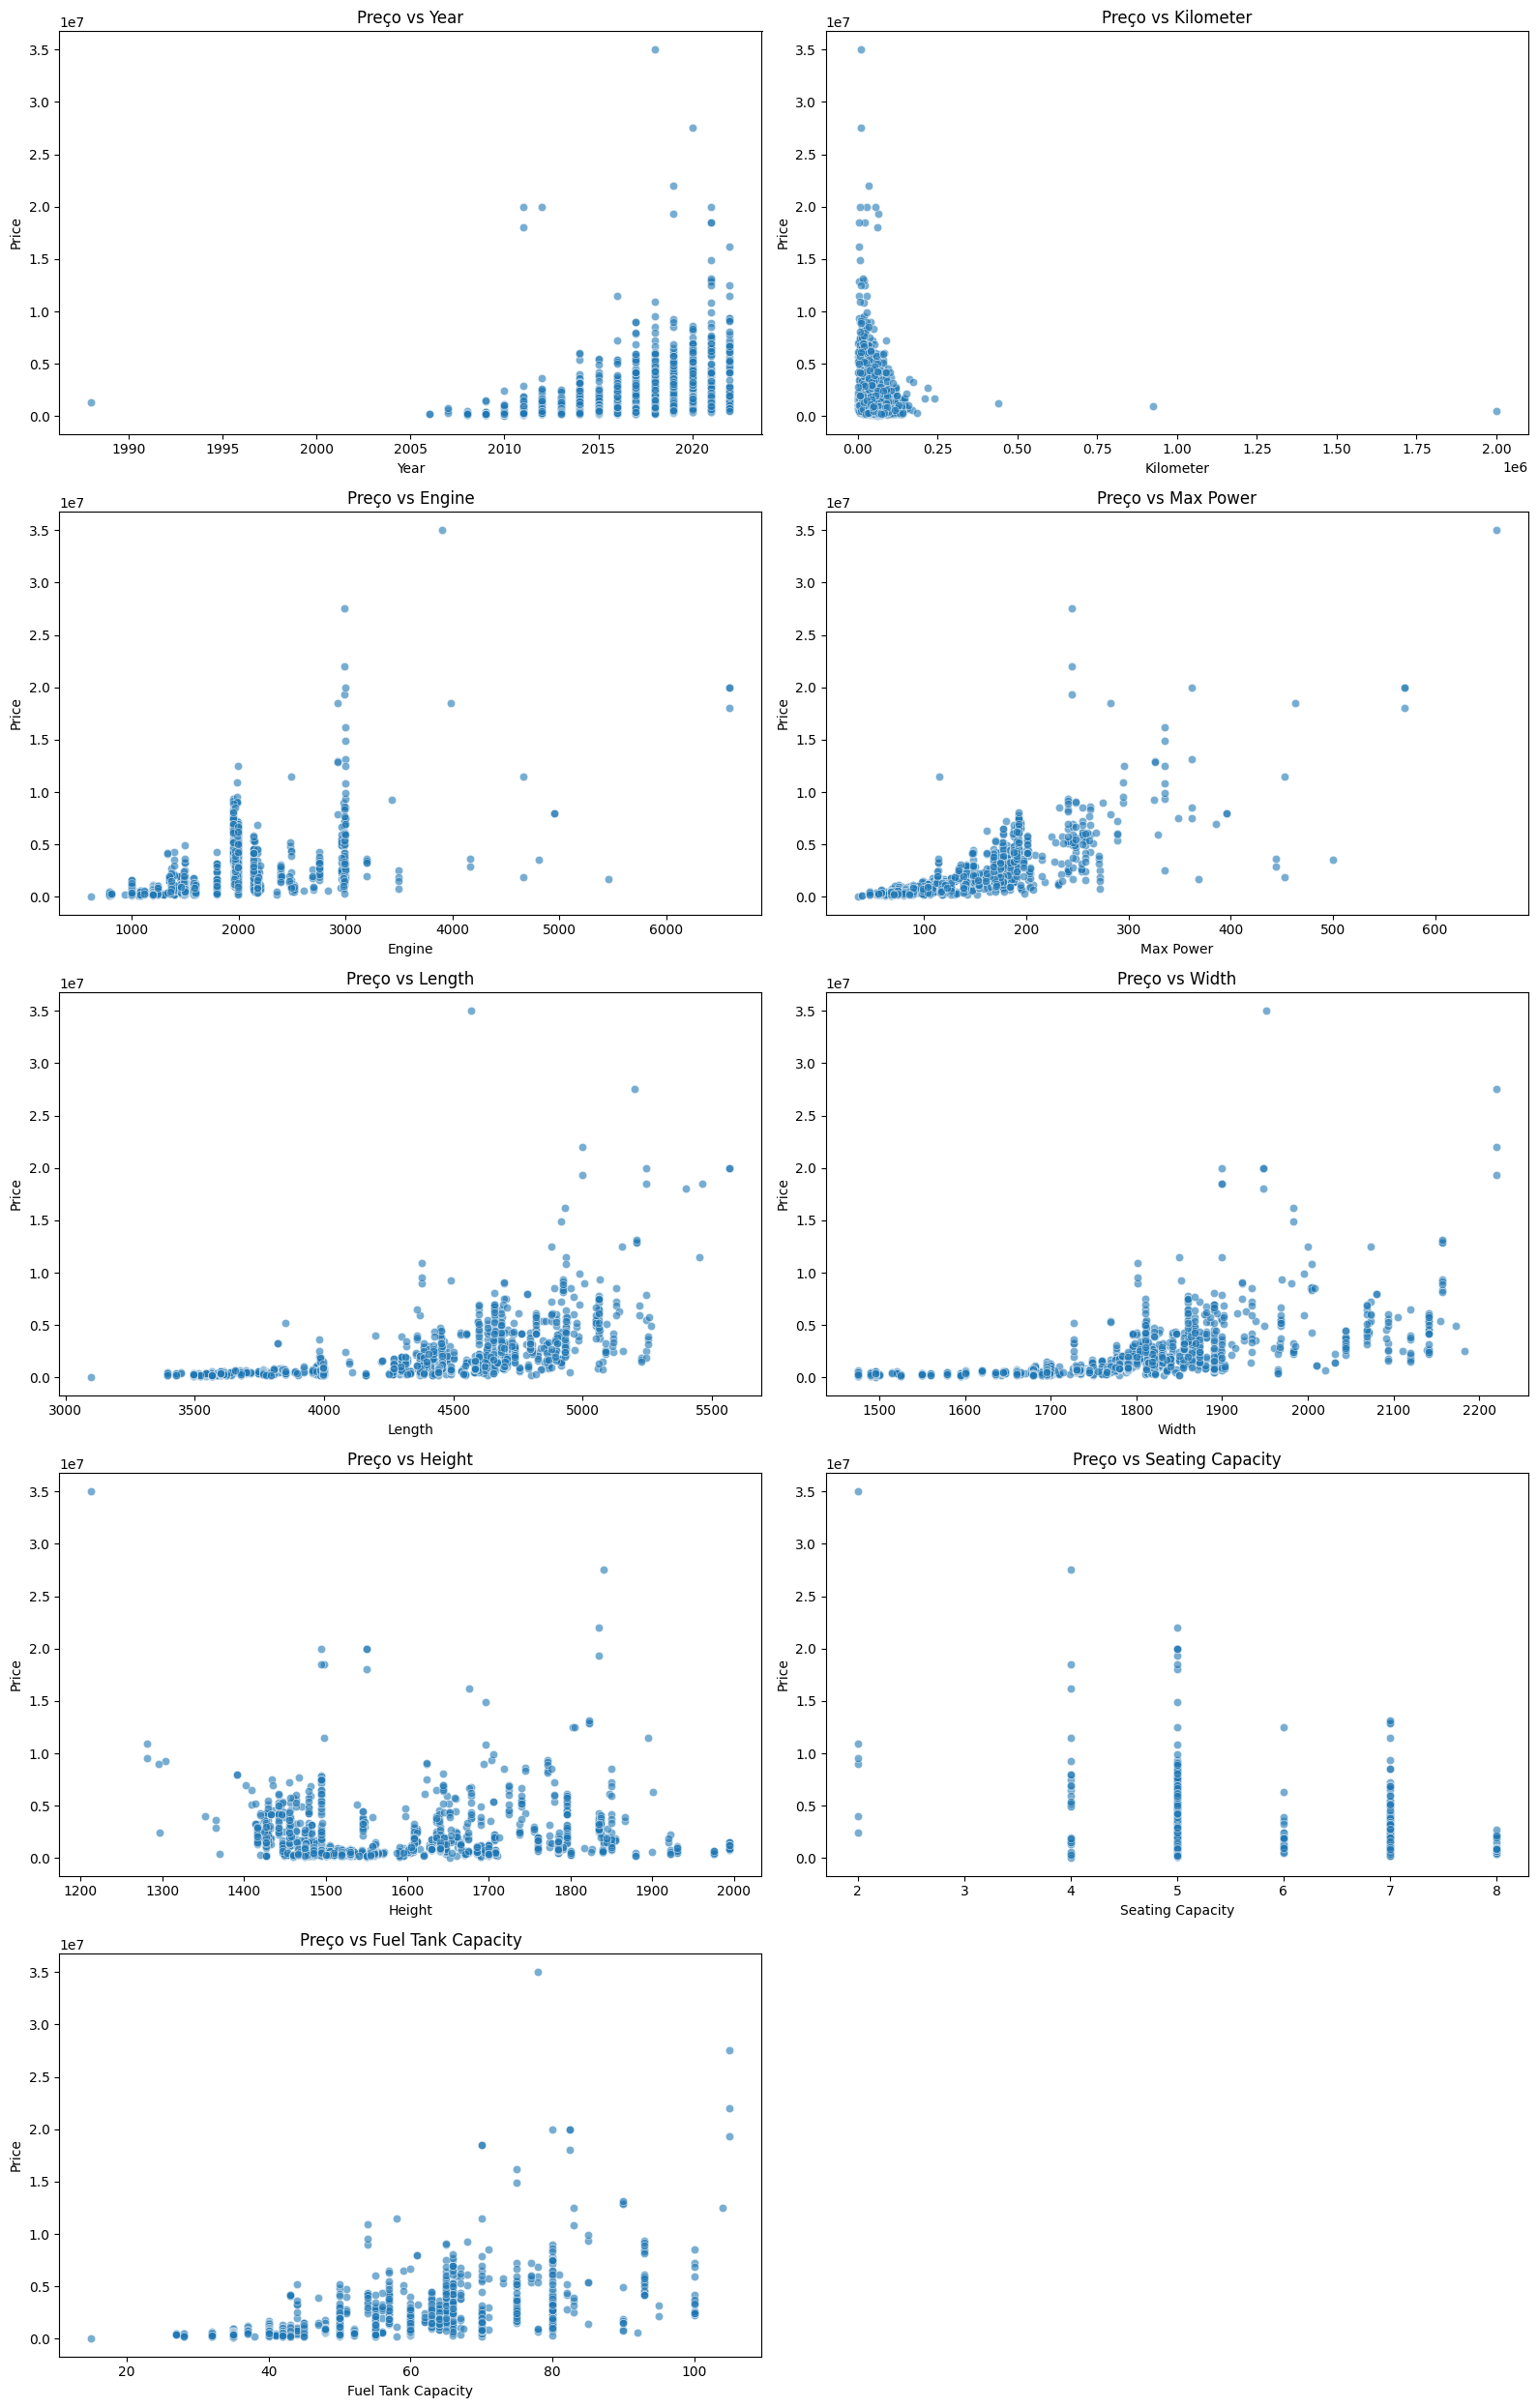

In [30]:
# importar bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# selecionar colunas numéricas
numeric_cols = numeric_df.columns.drop('Price')  # remover a própria variável dependente

# criar scatter plots entre cada variável numérica e o preço
plt.figure(figsize=(16, 25))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(data=df_car, x=col, y='Price', alpha=0.6)
    plt.title(f'Preço vs {col}')
    plt.tight_layout()

plt.show()

9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     1106.
Date:                Mon, 05 May 2025   Prob (F-statistic):          5.28e-191
Time:                        18:56:42   Log-Likelihood:                -29775.
No. Observations:                1874   AIC:                         5.955e+04
Df Residuals:                    1872   BIC:                         5.956e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.212e+06   1.26e+05    -17.523      0.0

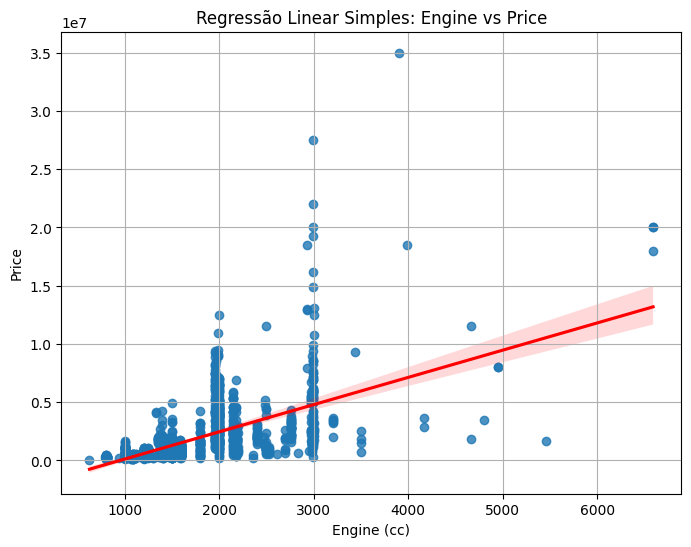

In [31]:
# importar bibliotecas
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# remover valores ausentes
df_model = df_car[['Engine', 'Price']].dropna()

# definir variáveis independente (X) e dependente (y)
X = df_model['Engine']
y = df_model['Price']

# adicionar constante para o modelo (intercepto)
X = sm.add_constant(X)

# ajustar modelo
model = sm.OLS(y, X).fit()

# exibir a tabela de regressão
print(model.summary())

# gráfico com reta estimada
plt.figure(figsize=(8, 6))
sns.regplot(x='Engine', y='Price', data=df_model, line_kws={"color": "red"})
plt.title('Regressão Linear Simples: Engine vs Price')
plt.xlabel('Engine (cc)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

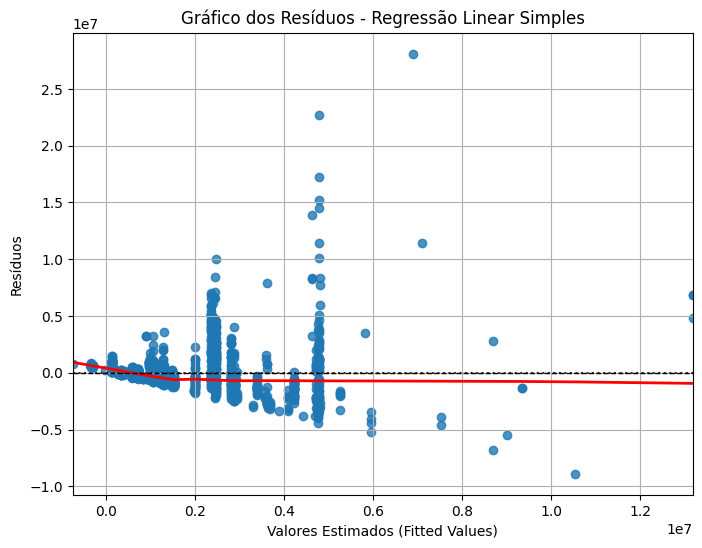

In [32]:
# calcular os resíduos
residuos = model.resid

# gráfico dos resíduos
plt.figure(figsize=(8, 6))
sns.residplot(x=model.fittedvalues, y=residuos, lowess=True, line_kws={"color": "red", "lw": 2})
plt.title('Gráfico dos Resíduos - Regressão Linear Simples')
plt.xlabel('Valores Estimados (Fitted Values)')
plt.ylabel('Resíduos')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     637.1
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        19:00:21   Log-Likelihood:                -29277.
No. Observations:                1874   AIC:                         5.857e+04
Df Residuals:                    1868   BIC:                         5.860e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.848e+06   7.19e+05     -3.964      0.0

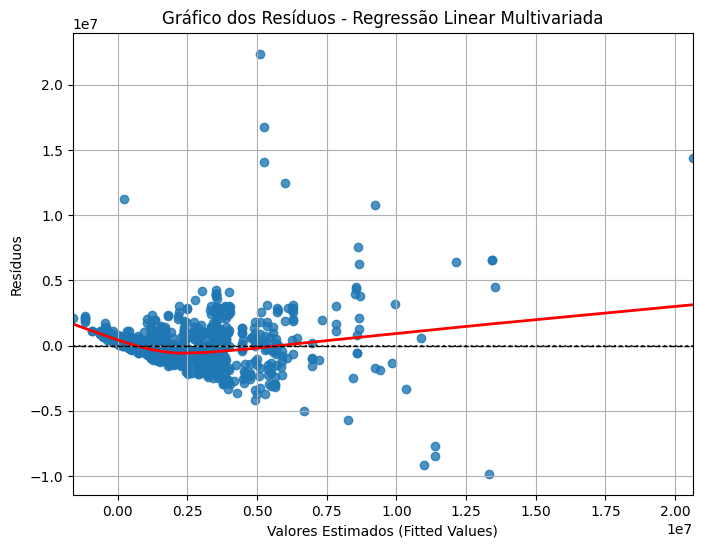

In [35]:
# selecionar colunas para o modelo
features = ['Engine', 'Max Power', 'Length', 'Width', 'Height']
df_multi = df_car[features + ['Price']].dropna()

# separar X e y
X_multi = df_multi[features]
y_multi = df_multi['Price']

# adicionar constante
X_multi = sm.add_constant(X_multi)

# ajustar modelo
model_multi = sm.OLS(y_multi, X_multi).fit()

# exibir tabela de regressão
print(model_multi.summary())

# calcular resíduos
residuos_multi = model_multi.resid

# gráfico dos resíduos
plt.figure(figsize=(8, 6))
sns.residplot(x=model_multi.fittedvalues, y=residuos_multi, lowess=True, line_kws={"color": "red", "lw": 2})
plt.title('Gráfico dos Resíduos - Regressão Linear Multivariada')
plt.xlabel('Valores Estimados (Fitted Values)')
plt.ylabel('Resíduos')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()